In [13]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)
import warnings
warnings.filterwarnings('ignore')

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
import tensorflow as tf

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


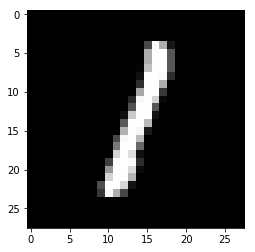

In [8]:
batch_xs, batch_ys = mnist.train.next_batch(1)
X = batch_xs
X = X.reshape([28,28])
plt.gray()
plt.imshow(X)
print(batch_ys)

In [9]:
x = tf.placeholder(tf.float32,[None, 784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x,W)+b)
y_ = tf.placeholder(tf.float32,[None, 10])

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

Instructions for updating:
Use tf.cast instead.


In [11]:
sess = tf.InteractiveSession()

In [12]:
tf.global_variables_initializer().run()

In [30]:
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step,feed_dict={x:batch_xs,y_:batch_ys})

In [31]:
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))

In [32]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [33]:
print(sess.run(accuracy,feed_dict={x:mnist.test.images, y_:mnist.test.labels}))

0.9191
